In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
 #tf.logging.set_verbosity(tf.logging.ERROR) - в инете пишут, что с версии выше 2,0 можно не указывать все это барахло
import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)
#tf.enable_eager_execution() - ----//----

2.3.1


In [3]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset ['train'], dataset['test']

In [4]:
# присвоим названия классов для будущей классификации
class_names = ['футболка/топ', 'шорты', 'свитер', 'платье', 'плащ', 'сандали', 'рубашка', 'кроссовок','сумка',',ботинок']

In [5]:
# посмотрим, что нам скажет анализ тех данных, которые мы раскидали по трейн тест
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('количество тренировочных экземпляров: {}'.format(num_train_examples))
print('количество тестовых экземпляров: {}'.format(num_test_examples))

количество тренировочных экземпляров: 60000
количество тестовых экземпляров: 10000


In [6]:
# применение функции нормализации и применение ее к каждому изображению
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels
# а тут присваиваем нормализованные значения уже определенным переменным
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

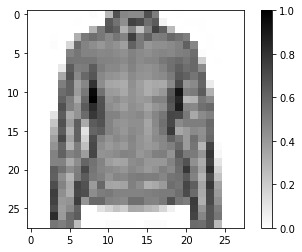

In [7]:
# удалим цветность с помощью метода решейп
for image, label in test_dataset.take(1):
    break;
image = image.numpy().reshape((28,28))
# отрисуем изображение
plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

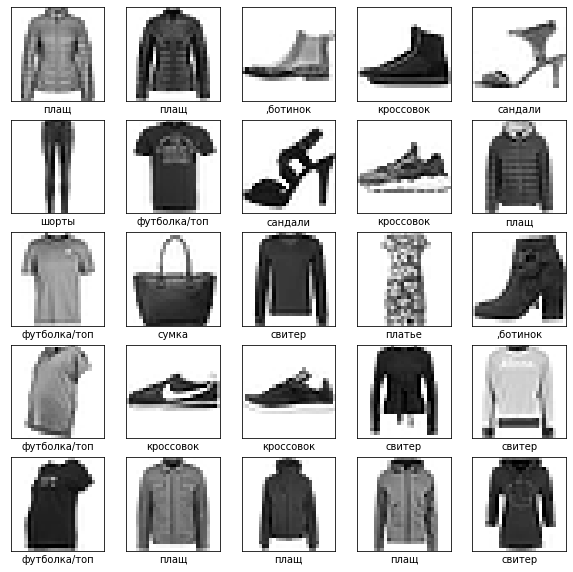

In [8]:
# отобразим первые 25 изображений
           
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()  

In [9]:
# накидаем входной, снутренний полносвязный и выходной слои сетки
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
# настроим функцию потерь, оптимизации и метрики для нашей модели
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
BATCH_SIZE = 10
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.2738 - accuracy: 0.8980
Epoch 2/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.2723 - accuracy: 0.8979
Epoch 3/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.2621 - accuracy: 0.9018
Epoch 4/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.2517 - accuracy: 0.9057
Epoch 5/5
6000/6000 [==============================] - 7s 1ms/step - loss: 0.2410 - accuracy: 0.9102


In [ ]:
# дальше есть еще кусок с предсказаниями и тому подобным https://habr.com/ru/post/454034/